Generation: 0	String: 7VP$RyM_AnCo{].oo	Fitness: 15
Generation: 1	String: 7VP$RyM_AnCo{].oo	Fitness: 15
Generation: 2	String: =8KHYXcar%g(;i/r3	Fitness: 14
Generation: 3	String: =8KHYXcar%g(;i/r3	Fitness: 14
Generation: 4	String: D27eKgPHGlgAwiF.H	Fitness: 13
Generation: 5	String:  wneCfKBtqgJJ)tpm	Fitness: 12
Generation: 6	String: @wneCfmBtlghJytCm	Fitness: 11
Generation: 7	String: @wneCfmBtlghJytCm	Fitness: 11
Generation: 8	String: @wneCfmBtlghJytCm	Fitness: 11
Generation: 9	String: bZneZic [ogv{2tQ3	Fitness: 10
Generation: 10	String: bZneZic [ogv{2tQ3	Fitness: 10
Generation: 11	String: [}nP8pc y%gWritzm	Fitness: 9
Generation: 12	String: .DneU=c 2Ago&ithm	Fitness: 7
Generation: 13	String: .DneU=c 2Ago&ithm	Fitness: 7
Generation: 14	String: .DneU=c 2Ago&ithm	Fitness: 7
Generation: 15	String: .DneU=c 2Ago&ithm	Fitness: 7
Generation: 16	String: .DneU=c 2Ago&ithm	Fitness: 7
Generation: 17	String: .DneU=c 2Ago&ithm	Fitness: 7
Generation: 18	String: :VneU=c [lgooithm	Fitness: 6
Generation:

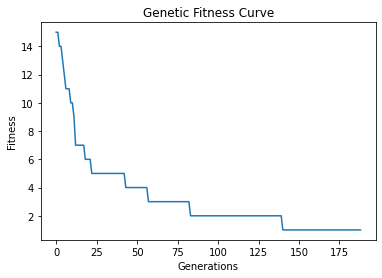

In [4]:
#Genetic Algorithm Without Crossing Over For Phrase Evolution
import numpy as np
import random 
import matplotlib.pyplot as plt
  



class GA:
  def parameters(self,population_size,chromosomes,target_genome):
    self.population=population_size
    self.chromosomes=chromosomes
    self.target_genome=target_genome

  def mutation(self,chromosomes):
    gene_chromosome= random.choice(self.chromosomes)
    return gene_chromosome

  def create_sequence(self,target_genome,chromosomes):
    sequence=[]
    for _ in range(len(self.target_genome)):
      sequence.append(self.mutation(self.chromosomes))
    return sequence

  def offspring(self,seq1,seq2):
    child_sequence=[]
    for s1,s2 in zip(seq1,seq2):
      if(random.random()<0.35):
        child_sequence.append(s1)
      elif(random.random()<0.7):
        child_sequence.append(s2)
      else:
        child_sequence.append(self.mutation(self.chromosomes))
    return child_sequence

  def fitness(self,child_seq,target):
    fitness=0
    for i,j in zip(child_seq,target):
      if i!=j:
        fitness+=1
    return fitness

if __name__=='__main__':
  ga=GA()
  gene_pool='''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''
  target_gene='Genetic Algorithm'
  ga.parameters(100,gene_pool,target_gene)
  generation=0
  gene_match=False
  fitness_array=[]
  gen_array=[]
  pop=[]
  for i in range(ga.population):
    ind_gene=ga.create_sequence(ga.chromosomes,ga.target_genome)
    pop.append(ind_gene)
  
  while not gene_match:
    pop = sorted(pop, key = lambda x:ga.fitness(x,ga.target_genome))
    z=pop[0]
    if ga.fitness(z,ga.target_genome) <= 0 : 
          gene_match = True
          break
    new_generation=[]
    sample=int((10*ga.population)/100)
    new_generation.extend(pop[:sample])
    mate_sample=int((90*ga.population)/100)
    
    for j in range(mate_sample):
      parent1=random.choice(pop[:50])
      parent2=random.choice(pop[:50])
      child=ga.offspring(parent1,parent2)
      new_generation.append(child)
    pop=new_generation
    w=ga.fitness(pop[0],ga.target_genome)
    fitness_array.append(w)
    gen_array.append(generation)
    print("Generation: {}\tString: {}\tFitness: {}". format(generation, "".join(pop[0]),w)) 
    generation += 1
  plt.plot(gen_array,fitness_array)
  plt.title('Genetic Fitness Curve')
  plt.xlabel('Generations')
  plt.ylabel('Fitness')
  plt.show()
    
    